In [50]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats

# Import the Logistic Regression class
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report,ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score

import pickle

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
print('done importing')

done importing


In [51]:
data = pd.read_csv("diabetes_new.csv")
data.head()

,Sex,Age,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Education,Income,Diabetes
0,0,9,1,1,1,40,1,0,0,0,...,1,0,1,0,5,18,1,4,3,0
1,0,7,0,0,0,25,1,0,0,1,...,0,0,0,1,3,0,0,6,1,0
2,0,9,1,1,1,28,0,0,0,0,...,0,0,1,1,5,30,1,4,8,0
3,0,11,1,0,1,27,0,0,0,1,...,1,0,1,0,2,0,0,3,6,0
4,0,11,1,1,1,24,0,0,0,1,...,1,0,1,0,2,3,0,5,4,0


In [64]:
f_values = {}
for i in data.columns:
    count = data[i].nunique()
    if count == 1:
        f_values[i] = count

cols_drop = list(f_values.keys())
print('Columns to drop are: ',cols_drop)

Columns to drop are:  []


In [65]:
# Overview of data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Sex                   253680 non-null  int64
 1   Age                   253680 non-null  int64
 2   HighBP                253680 non-null  int64
 3   HighChol              253680 non-null  int64
 4   CholCheck             253680 non-null  int64
 5   BMI                   253680 non-null  int64
 6   Smoker                253680 non-null  int64
 7   Stroke                253680 non-null  int64
 8   HeartDiseaseorAttack  253680 non-null  int64
 9   PhysActivity          253680 non-null  int64
 10  PhysHlth              253680 non-null  int64
 11  Fruits                253680 non-null  int64
 12  Veggies               253680 non-null  int64
 13  HvyAlcoholConsump     253680 non-null  int64
 14  AnyHealthcare         253680 non-null  int64
 15  NoDocbcCost           253680 non-n

In [53]:
#select variables that are medically likely to predict diabetes
dm = data[["Sex","Age","HighBP","HighChol","CholCheck","BMI","Smoker","Stroke","PhysActivity","PhysHlth","Fruits","Veggies","HvyAlcoholConsump","Diabetes"]]
dm.head()

,Sex,Age,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,PhysHlth,Fruits,Veggies,HvyAlcoholConsump,Diabetes
0,0,9,1,1,1,40,1,0,0,15,0,1,0,0
1,0,7,0,0,0,25,1,0,1,0,0,0,0,0
2,0,9,1,1,1,28,0,0,0,30,1,0,0,0
3,0,11,1,0,1,27,0,0,1,0,1,1,0,0
4,0,11,1,1,1,24,0,0,1,0,1,1,0,0


In [54]:
dm.shape

(253680, 14)

In [55]:
#Features Selection - Step 1
#1. Define X,y
# #Data splitting

y = (dm['Diabetes']).astype(int)
X = dm.loc[:, dm.columns != 'Diabetes']  # everything except "Diabetes"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
X_train.shape

(177576, 13)

In [57]:
X_test.shape

(76104, 13)

In [58]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg_model.predict(X_test)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

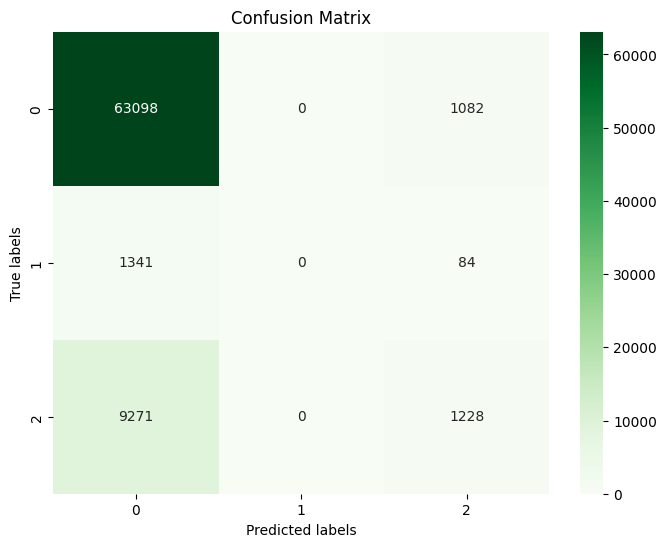

In [62]:
# Make predictions on the test set
# y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [59]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# print("ROC AUC Score:", roc_auc)

Accuracy: 0.8442263218753285
Precision: 0.7916207873680003
Recall: 0.8442263218753285
F1 Score: 0.8000079514808305


In [60]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create and train the logistic regression model
model = LogisticRegression()
# model.fit(X_train_scaled, y_train)
model.fit(X,y)
# model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

print("The accuracy of the model is:", accuracy)
# print("The precision of the model is:", precision)
# print("F1 Score:", f1)

The accuracy of the model is: 0.8452380952380952


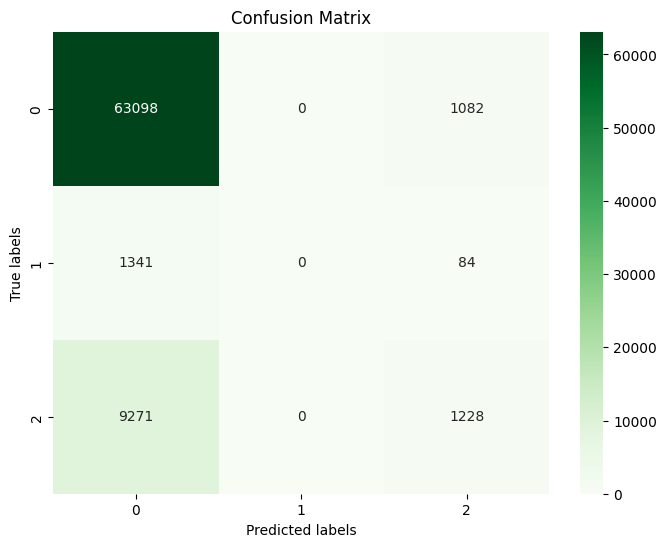

In [63]:
# Make predictions on the test set
# y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()